

### <b>Problem Statement</b>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### <b> Business Goal</b>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [57]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Importing the dataset
dataset = pd.read_csv('D:/Courses/Alma better/Data/CarPrice_project.csv')

In [59]:
dataset.shape

(205, 26)

### Data Inspection

In [60]:
# First look
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### <b>DataSet Information:</b>

Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric) we are supposing that our price is in dollers as the company is going to open its branch in US

In [62]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [63]:
# duplicate
dataset.duplicated()
len(dataset[dataset.duplicated()])


0

In [64]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Exploratory Data Analysis

<AxesSubplot:xlabel='price', ylabel='Density'>

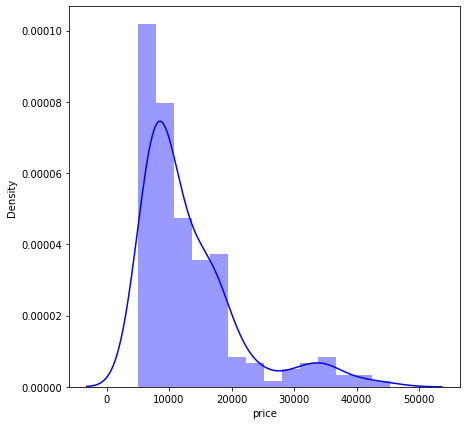

In [65]:
# # Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(dataset['price'],color="b")
#x = np.random.randn(100)
#ax = sns.distplot(x)

<AxesSubplot:xlabel='price', ylabel='Density'>

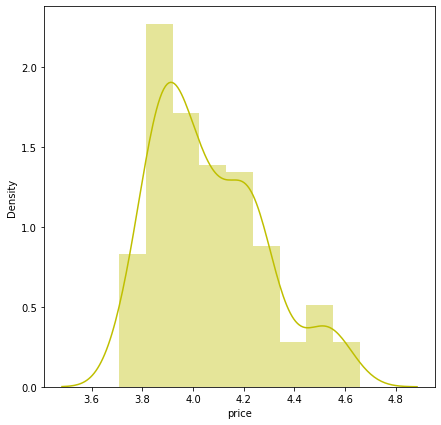

In [66]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['price']),color="y")

## **Basic EDA :**

In [67]:
numeric_features = dataset.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##### Plotting for differnt numerical features :

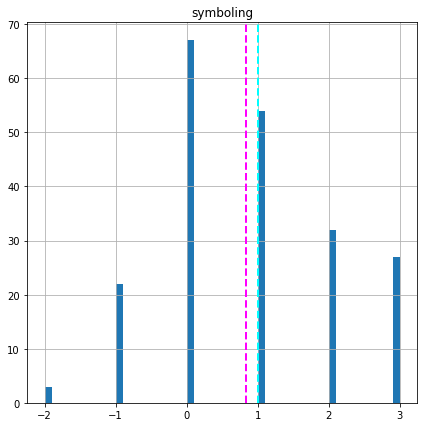

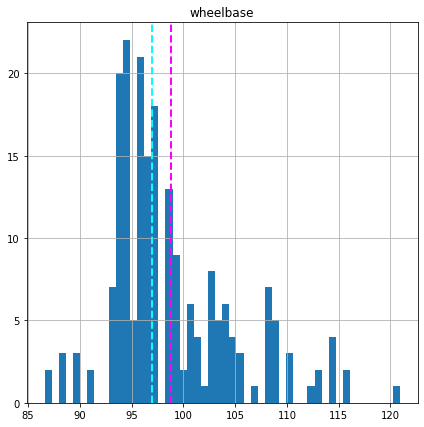

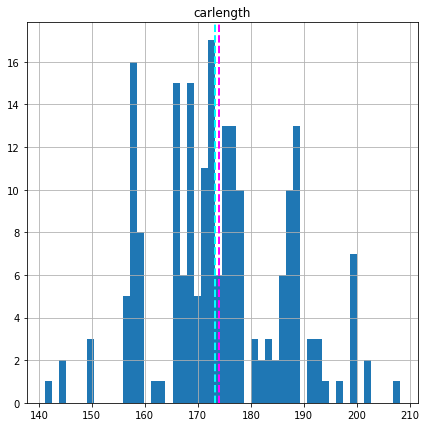

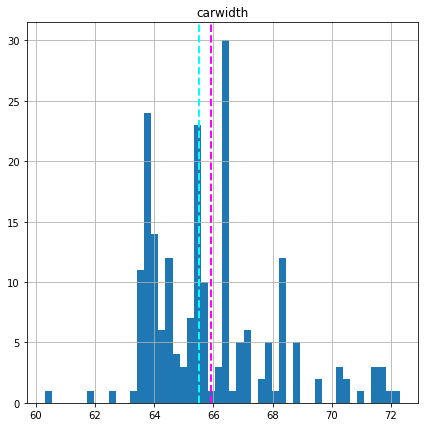

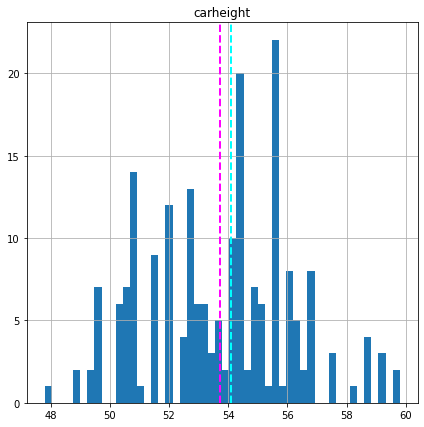

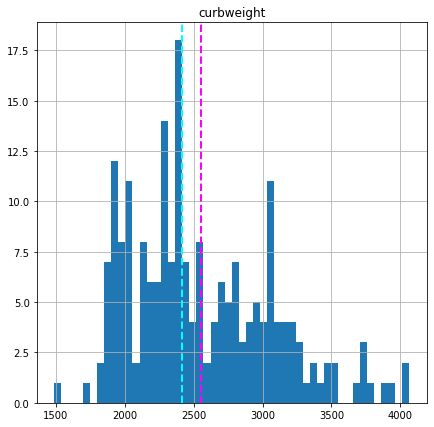

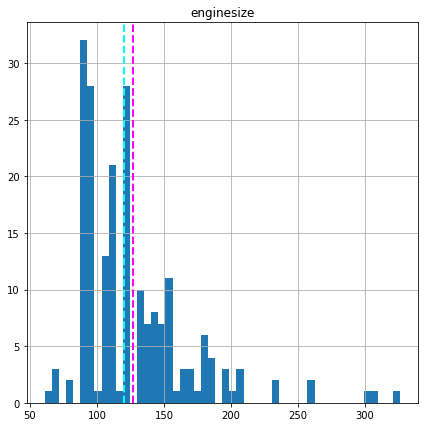

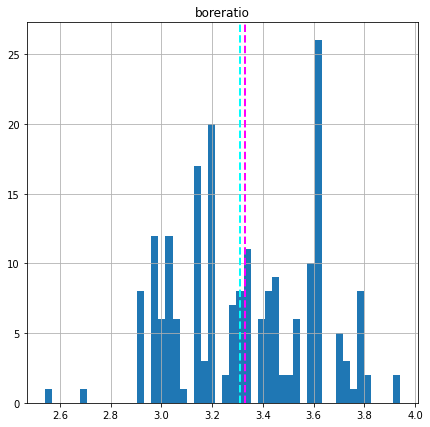

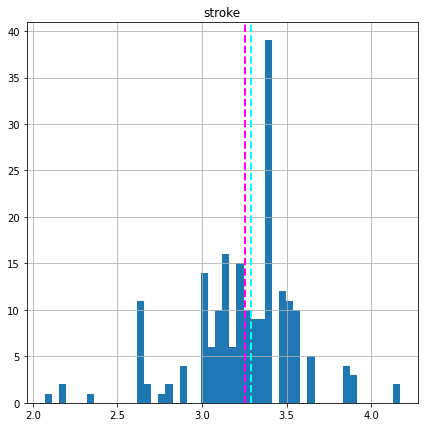

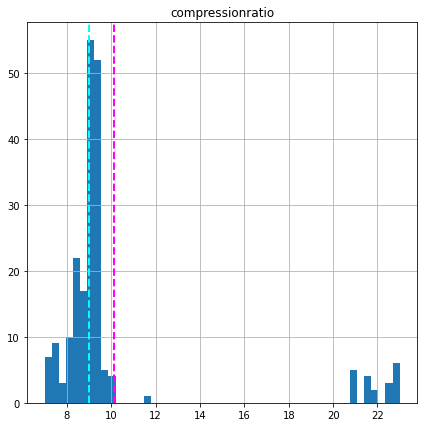

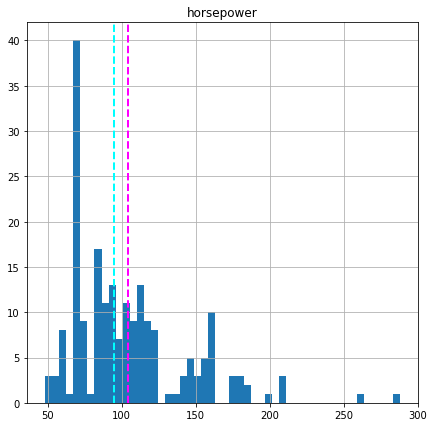

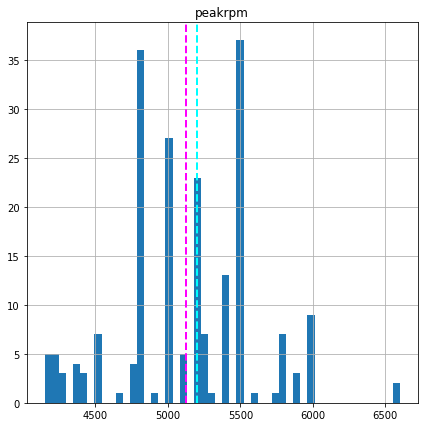

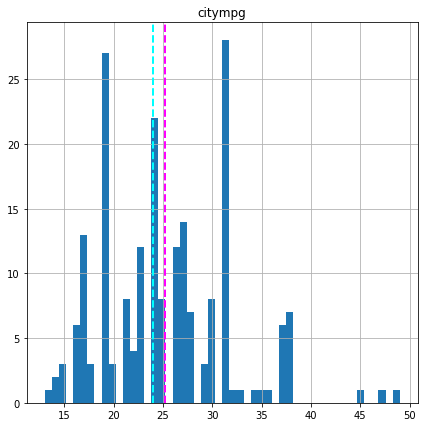

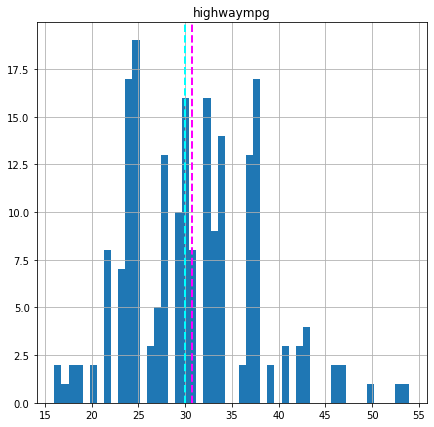

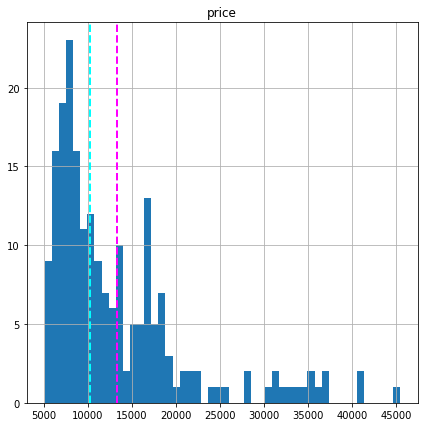

In [68]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### Plotting of Correlation Heatmap

<AxesSubplot:>

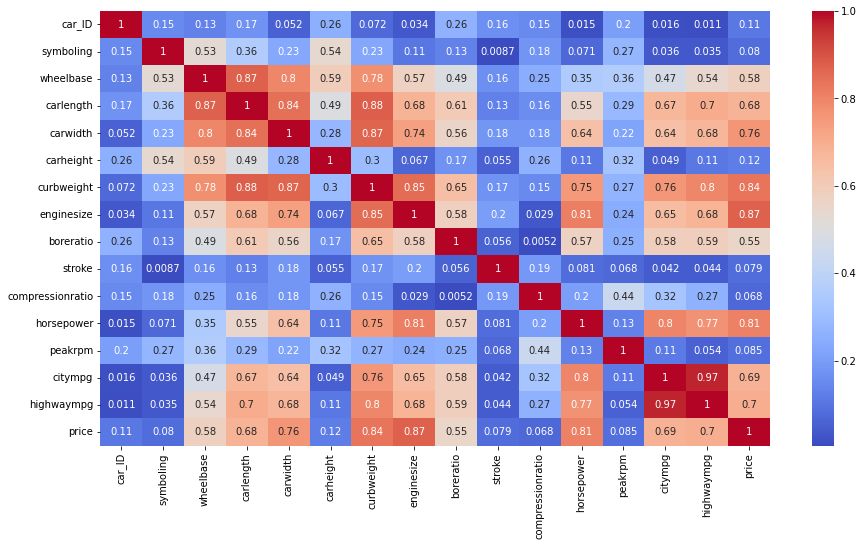

In [69]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [70]:
### removing multicollear
dataset['mileage'] = 0.6*dataset['citympg'] + 0.4*dataset['highwaympg']
dataset['car_area'] = dataset['carlength']*dataset['carwidth']

In [71]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [72]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price']]])

,variables,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


In [73]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price',"carlength","carwidth","citympg","highwaympg","wheelbase","carheight","car_area"]]])

,variables,VIF
0,symboling,1.814953
1,curbweight,198.427552
2,enginesize,65.617706
3,boreratio,187.712520
4,stroke,112.853620
5,compressionratio,15.189976
6,horsepower,48.625774
7,peakrpm,137.896263
8,mileage,65.810022


In [74]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])

,variables,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,mileage,8.201171


In [75]:
numerical_features = ['enginesize','compressionratio','mileage']

##### For Categorical Features

In [76]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [77]:
dataset['company'] = dataset['CarName'].str.split(" ", expand=True)[0]
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: company, dtype: int64

In [78]:
## Getting the caategorical features
categorical_features = dataset.describe(include=['object','category']).columns

#### Plotting for  Categorical  Features

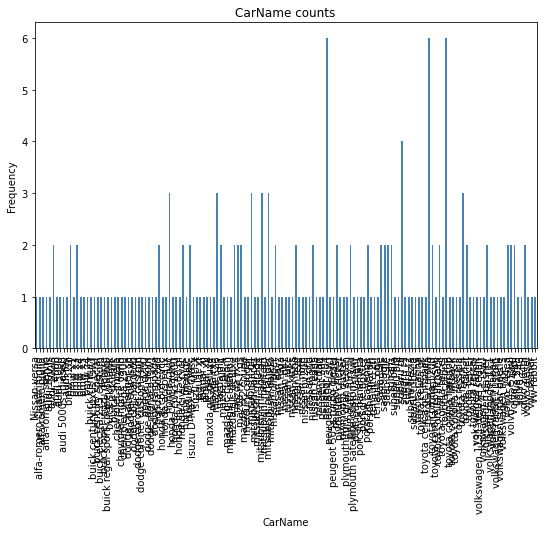

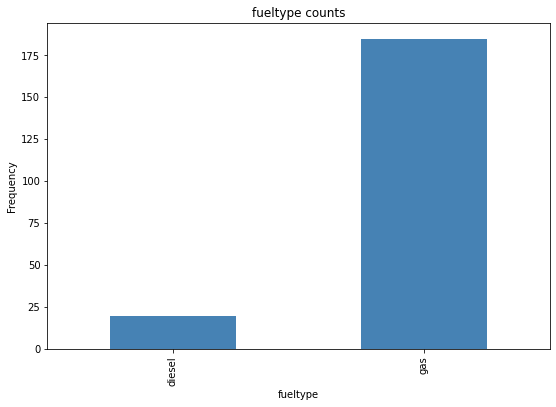

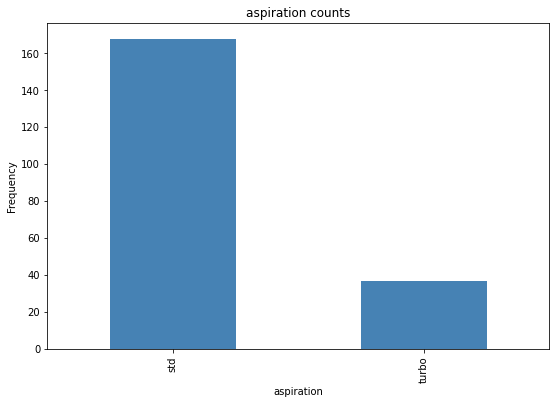

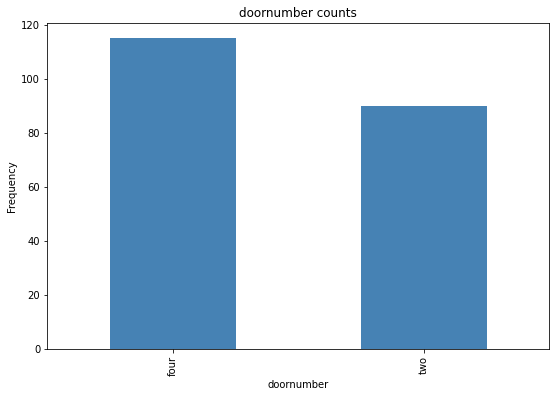

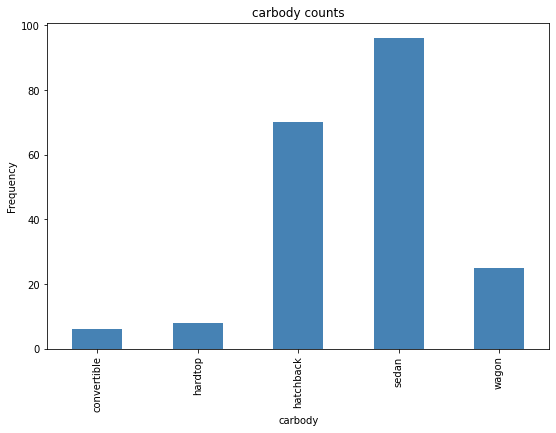

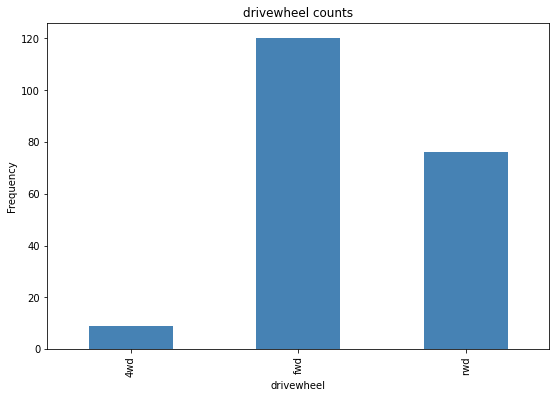

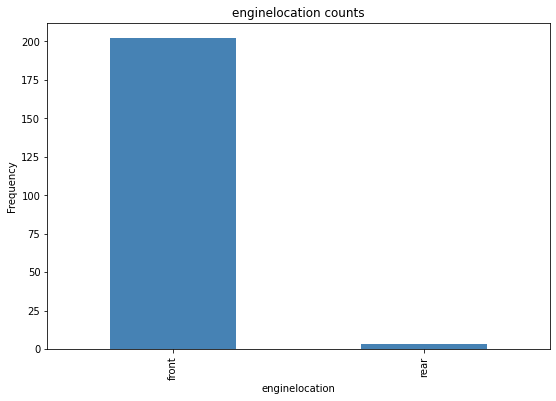

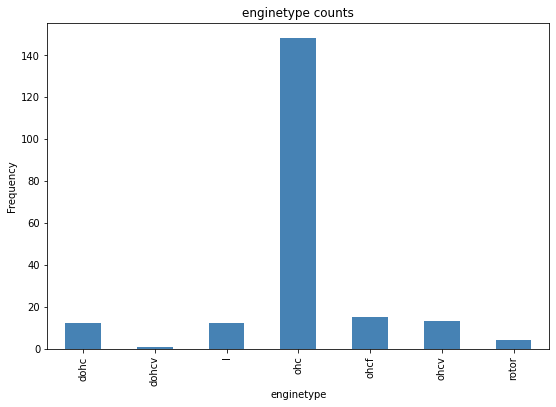

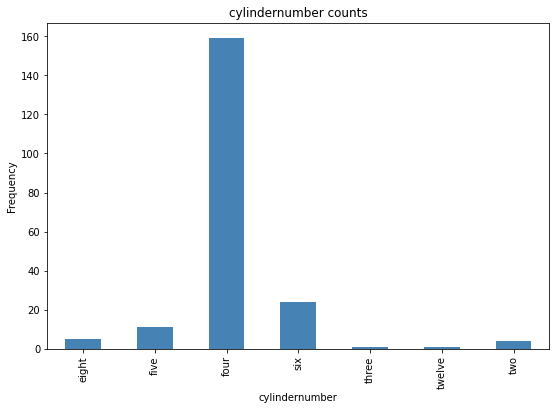

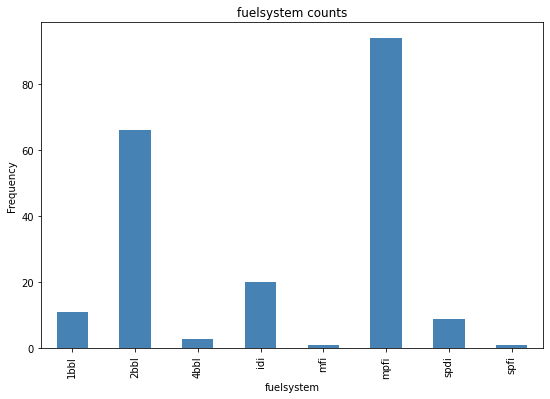

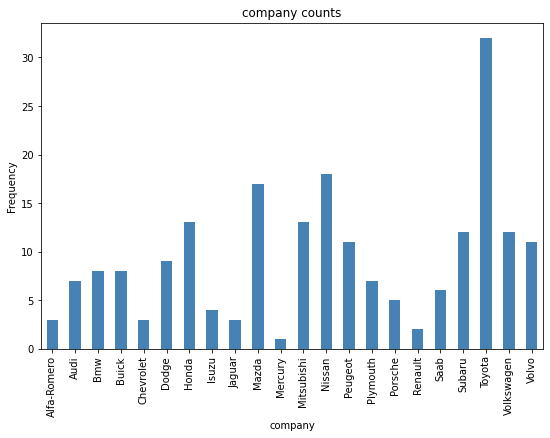

In [79]:

for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [80]:
dataset["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

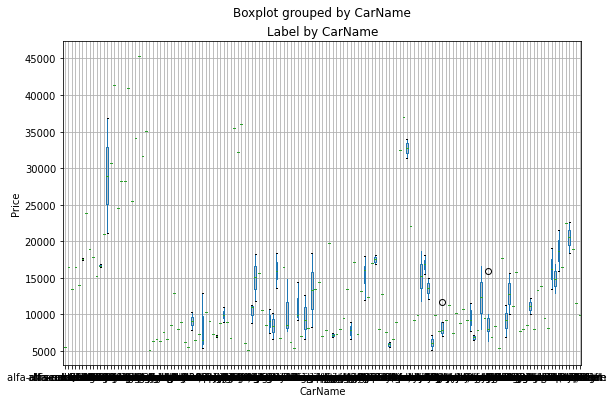

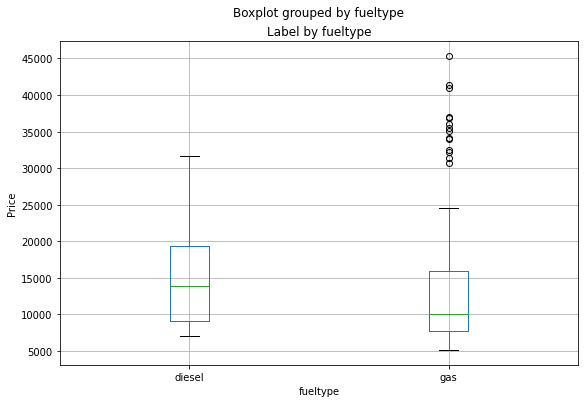

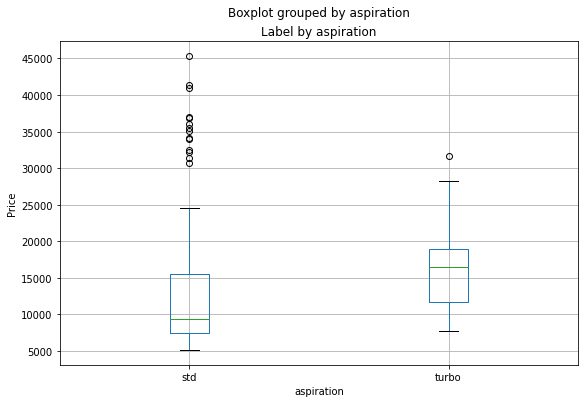

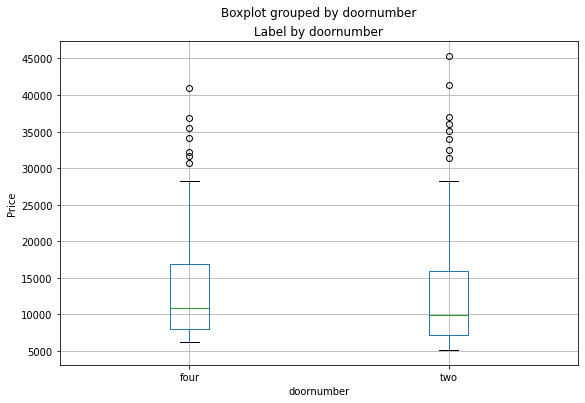

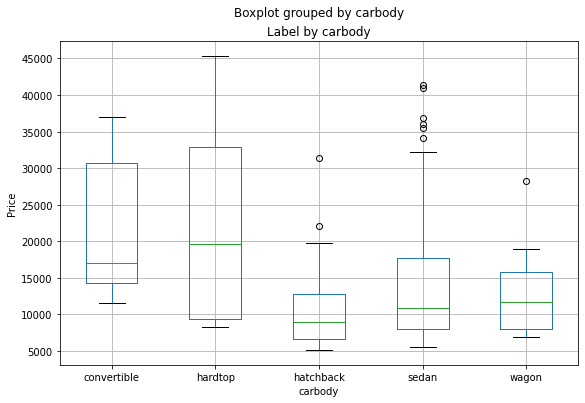

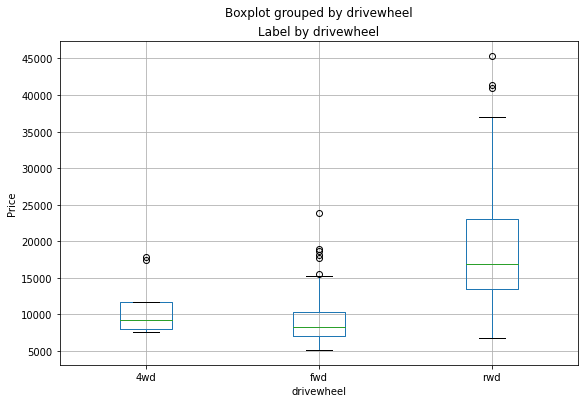

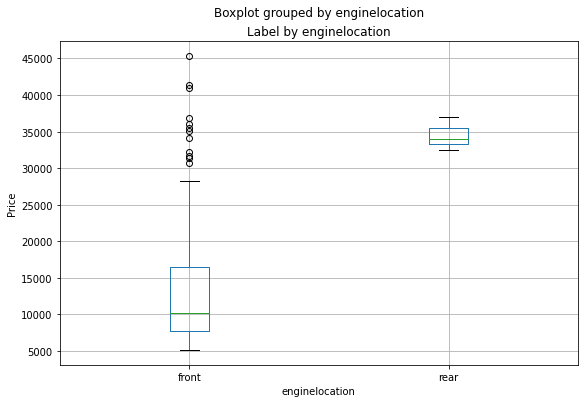

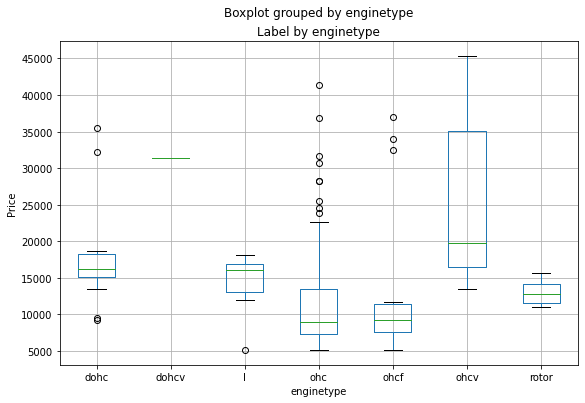

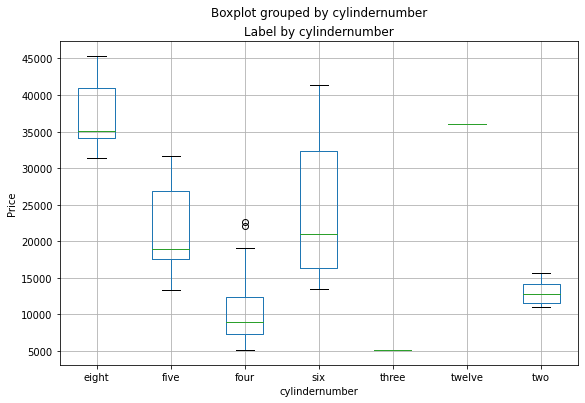

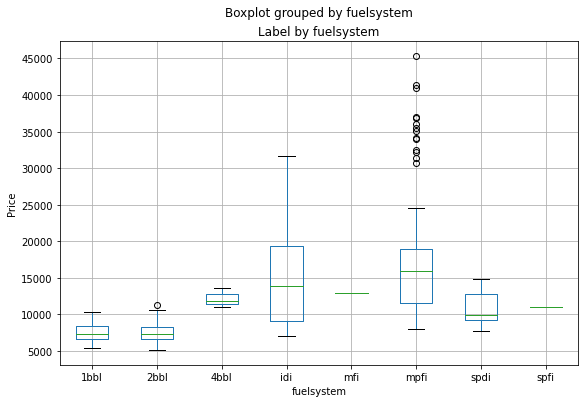

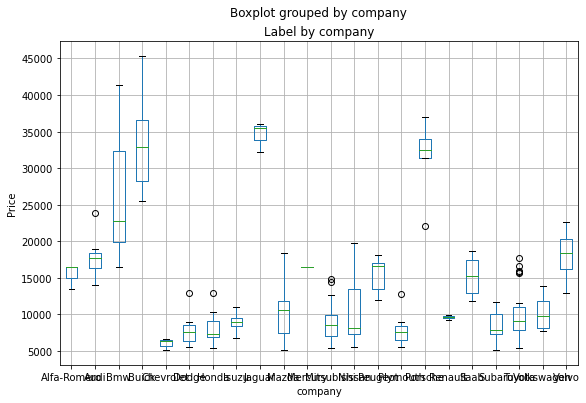

In [81]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 1440x432 with 0 Axes>

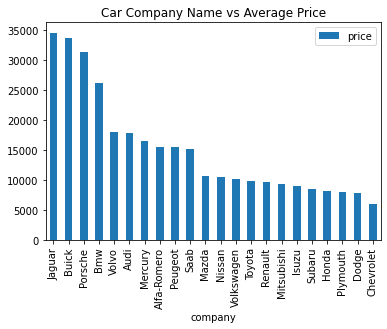

In [82]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [83]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)

In [84]:
dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [85]:
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [86]:
dataset["company_cat"].value_counts()

0    142
1     39
2     24
Name: company_cat, dtype: int64

In [87]:
correlation.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [88]:
dataset_pr = dataset.copy()

In [89]:
dataset.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [90]:
### Data encoding
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

dataset_pr = dataset_pr.replace(encoders_nums)


In [91]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [92]:
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [93]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

features

['enginesize',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [94]:
len(features)

24

##### My Dataset is ready for Modelling 

In [111]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features]##.apply(zscore)

In [112]:
y = dataset_pr['price']

In [113]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


### **1. Linear Regression**

In [114]:
# Exporting and initiating the Linear lin_modelression model
# from sklearn.linear_model import Linearlin_modelression
lin_model = LinearRegression().fit(X_train, y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

In [115]:
# Now let's check the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)
print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train, y_pred_train)}')
print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train, y_pred_train)**0.5}')
print(f'The R2 score for training set is : {r2_score(y_train, y_pred_train)}')
print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test, y_pred_test)}')
print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test, y_pred_test)**0.5}')
print(f'The R2 score for testing set is : {r2_score(y_test, y_pred_test)}')

The Mean Squared Error (MSE) for training set is : 3619501.325353073
The Root Mean Squared Error (RMSE) for training set is : 1902.4987057428116
The R2 score for training set is : 0.9397051391444774
The Mean Squared Error (MSE) for testing set is : 12200489.859930253
The Root Mean Squared Error (RMSE) for testing set is : 3492.9199618557327
The R2 score for testing set is : 0.8424042393609606


##### We can see that our Linear Regression is overfitting as the training r2 score is 0.93 whereas the r2 score is 0.84 for Test Data, and we can see that our model can predict the price with an error of 3492.91 dollers.

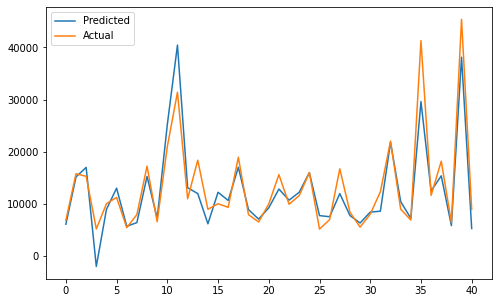

In [116]:
# Plotting Predicted Vs Actual on Test data
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#### Meanwhile, let's define the function I talked about.

In [117]:
def model_trainer_tester(model, X_train_func, X_test_func, y_train_func, y_test_func, params = None):
  '''
  This function takes model, training and testing sets and parameter combinations as input
  and gives model performance and best parameters as output
  '''

  # Importing evaluation metrics
  from sklearn.metrics import mean_squared_error, r2_score

  # Conditioning if a parameter set is provided or not
  if params == None:

    # Fitting the model
    optimal_model.fit(X_train_func, y_train_func)

    # Prediction on training set
    y_pred_train = optimal_model.predict(X_train_func)
    # Prediction on testing set
    y_pred_test = optimal_model.predict(X_test_func)

    # Getting and printing evaluation metrics
    print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)}')
    print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)**0.5}')
    print(f'The R2 score for training set is : {r2_score(y_train_func, y_pred_train)}')
    print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)}')
    print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)**0.5}')
    print(f'The R2 score for testing set is : {r2_score(y_test_func, y_pred_test)}')
  else:

    # Importing GridSearchCV
    from sklearn.model_selection import GridSearchCV

    # Grid Search on provided parameter sets
    reg_model = GridSearchCV(estimator = model, param_grid = params, scoring = 'r2', cv = 3, verbose = 2)
    reg_model.fit(X_train_func, y_train_func)

    # Getting the optimal model and parameters
    optimal_model = reg_model.best_estimator_
    optimal_model.fit(X_train_func, y_train_func)
    optimal_params = reg_model.best_params_

    # Prediction on training set
    y_pred_train = optimal_model.predict(X_train_func)

    # Prediction on testing set
    y_pred_test = optimal_model.predict(X_test_func)

    # Getting and printing evaluation metrics and best hyperparameters
    print(f'Best hyperparameter combination is : {optimal_params}')
    print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)}')
    print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)**0.5}')
    print(f'The R2 score for training set is : {r2_score(y_train_func, y_pred_train)}')
    print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)}')
    print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)**0.5}')
    print(f'The R2 score for testing set is : {r2_score(y_test_func, y_pred_test)}')
  return y_pred_train,y_pred_test,optimal_model

### **2. Ridge Regularised Linear Regression :**

RSS + a.sumamtion beta^2

In [118]:
# Exporting and initiating the Ridge Regularized Linear Regression model
from sklearn.linear_model import Ridge
parameters = [{'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}]
y_pred_train,y_pred_test,ridge_model=model_trainer_tester(model = Ridge(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-08; total time=   0.0s
[CV] END ........................................alpha=1e-08; total time=   0.0s
[CV] END ........................................alpha=1e-08; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END .......................................

##### We can see that our Ridge Regularised Linear Regression is an improvement over Linear regression as the training r2 score is 0.87 whereas the r2 score is 0.86 for Test Data, and we can see that our model can predict the price with an error of 3255.10 dollers.

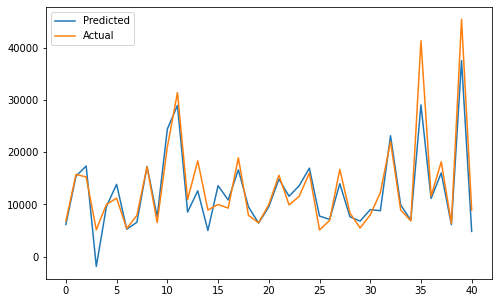

In [119]:
# Plotting Predicted Vs Actual on Test data
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

##### Lets Try out Lasso Regression to see if there is any furthur improvement

### **3. Lasso Regularized Linear Regression :**

In [125]:
# Exporting and initiating the Lasso Regularized Linear Regression model
from sklearn.linear_model import Lasso
parameters = [{'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}]
y_pred_train,y_pred_test,lasso_model = model_trainer_tester(model = Lasso(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-13; total time=   0.0s
[CV] END ........................................alpha=1e-13; total time=   0.0s
[CV] END ........................................alpha=1e-13; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-08; total time=   0.0s
[CV] END ........................................alpha=1e-08; total time=   0.0s
[CV] END .......................................

##### Yes Lasso Regularised Linear Regression is an improvement over both Linear regression as well as Ridge Regression and the training r2 score is 0.89 whereas the r2 score is 0.89 for Test Data, and we can see that our model can predict the price with an error of 3156.77 dollers.

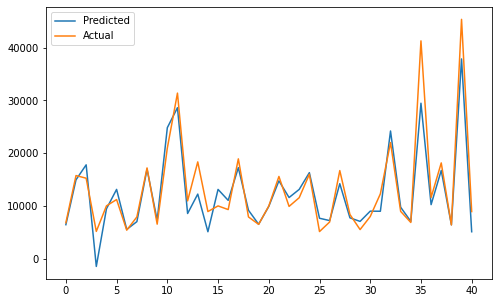

In [121]:
# Plotting Predicted Vs Actual on Test data
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#### Now Lets move on to Tree based models

### **4. Random Forest:**

In [122]:

# Exporting and initiating the Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
parameters = [{'n_estimators' : [100],
               'max_depth' : [8],
               'min_samples_split' : [6]}]
y_pred_train,y_pred_test,rf_model = model_trainer_tester(model = RandomForestRegressor(n_jobs = -1), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .max_depth=8, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END .max_depth=8, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END .max_depth=8, min_samples_split=6, n_estimators=100; total time=   0.0s
Best hyperparameter combination is : {'max_depth': 8, 'min_samples_split': 6, 'n_estimators': 100}
The Mean Squared Error (MSE) for training set is : 1551345.4893809068
The Root Mean Squared Error (RMSE) for training set is : 1245.5302041222874
The R2 score for training set is : 0.9741571691752482
The Mean Squared Error (MSE) for testing set is : 6703558.753695861
The Root Mean Squared Error (RMSE) for testing set is : 2589.1231630990173
The R2 score for testing set is : 0.9134090144817161


#### Wow Random Forest gave the best accuracy among all the other models . It gave an accuracy of 0.92 in both training and testing data . I would have classified it as an overfit model if our test score too wasn't the same!

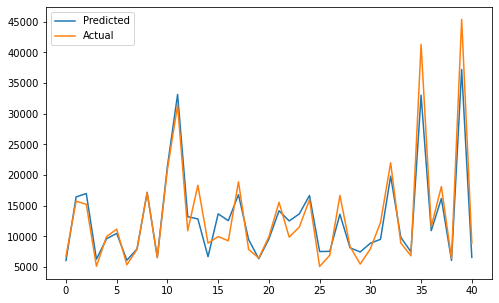

In [123]:
# Plotting Predicted Vs Actual on Test data
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#### For the final part of this section, I am going to check variable importance in Linear Model and Random Forest Model to get an idea of important variables.

Text(0, 0.5, 'Coefficient of feature')

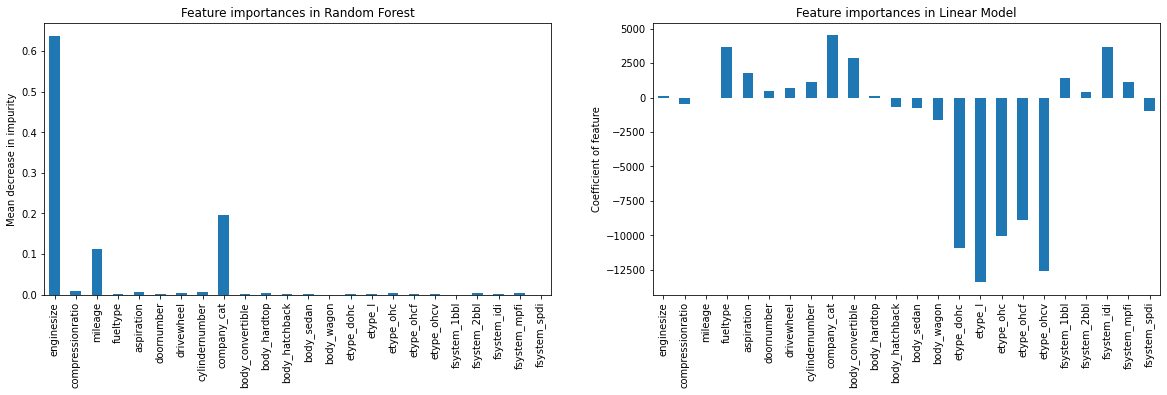

In [124]:
# Getting Feature Importances
feature_importance = rf_model.feature_importances_
forest_importances = pd.Series(feature_importance, index=features)

# Getting coefficients
coeffs = lin_model.coef_
coeffs_lin_model = pd.Series(coeffs, index=features)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
# Plotting feature importance for Random Forest
forest_importances.plot.bar()
plt.title("Feature importances in Random Forest")
plt.ylabel("Mean decrease in impurity")

plt.subplot(1,2,2)
# Plotting feature importance for Linear Model
coeffs_lin_model.plot.bar()
plt.title("Feature importances in Linear Model")
plt.ylabel("Coefficient of feature")

Now, this is an interesting picture. In Random Forest  enginesize, mileage and company category are the main features that are being used in estimating price value . But in the case of Linear Regression, almost all the other variables have an impact on estimating the price except for enginesize and mileage and features body type and Engine Type is bringing down the accuracy of the model. This might be the reason that Linear Models were so poor performance.